In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sklearn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [3]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *

from Inject_Missing_Values import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

**Load Data**

In [4]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\adult\adult_data_GroundTruth.csv', delimiter=',', header=0)

# Store feature columns in a DataFrame


X= groundTruth.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth.iloc[:, -1]  # Selects all rows and only the last column


In [5]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             45222 non-null  int64
 1   workclass       45222 non-null  int64
 2   fnlwgt          45222 non-null  int64
 3   education-num   45222 non-null  int64
 4   marital-status  45222 non-null  int64
 5   occupation      45222 non-null  int64
 6   relationship    45222 non-null  int64
 7   race            45222 non-null  int64
 8   sex             45222 non-null  int64
 9   capital-gain    45222 non-null  int64
 10  capital-loss    45222 non-null  int64
 11  hours-per-week  45222 non-null  int64
 12  native-country  45222 non-null  int64
 13  income          45222 non-null  int64
dtypes: int64(14)
memory usage: 4.8 MB


Checking Number of unique values

In [6]:
groundTruth.nunique()

age                  74
workclass             4
fnlwgt            26741
education-num        16
marital-status        3
occupation            3
relationship          4
race                  2
sex                   2
capital-gain        121
capital-loss         97
hours-per-week       96
native-country        6
income                4
dtype: int64

In [41]:
print("age",groundTruth['age'].unique())
print("workclass",groundTruth['workclass'].unique())
print("fnlwgt",groundTruth['fnlwgt'].unique())
print("education-num",groundTruth['education-num'].unique())
print("marital-status",groundTruth['marital-status'].unique())
print("occupation",groundTruth['occupation'].unique())
print("relationship",groundTruth['relationship'].unique())
print("race",groundTruth['race'].unique())
print("sex",groundTruth['sex'].unique())
print("capital-gain",groundTruth['capital-gain'].unique())
print("capital-loss",groundTruth['capital-loss'].unique())
print("hours-per-week",groundTruth['hours-per-week'].unique())
print("native-country",groundTruth['native-country'].unique())
print("income",groundTruth['income'].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
workclass [1 3 2 4]
fnlwgt [ 77516  83311 215646 ... 173449  89686 350977]
education-num [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
marital-status [3 1 2]
occupation [1 2 3]
relationship [4 1 2 3]
race [1 2]
sex [1 2]
capital-gain [ 2174     0 14084  5178  5013  2407 14344 15024  7688  4064  4386  7298
  1409  3674  1055  2050  2176   594 20051  6849  4101  8614  3411  2597
 25236  4650  2463  3103 10605  2964  3325  2580  3471  4865 99999  6514
  1471  2329  2105  2885 10520  2202  2961 27828  6767  2228  1506 13550
  2635  5556  4787  3781  3137  3818   914   401  2829  2977  4934  2062
  2354  3464  5455 15020  1424  3273 22040  4416 10566  4931  7430 34095
  6497  3908   114  2346  2907  1151  9386  2414  2290  3418 15831 41310
  4508  2538  3456  

In [7]:
groundTruth_tensor = torch.tensor(scale(groundTruth)) #converting groundTruth to Tensor, z-score scaling

In [8]:
print("minimum: ",groundTruth_tensor.min())
print("maximum:",groundTruth_tensor.max())
print("mean: ",groundTruth_tensor.mean())
print("median: ", groundTruth_tensor.median())

minimum:  tensor(-3.7276)
maximum: tensor(13.1752)
mean:  tensor(-1.7732e-18)
median:  tensor(-0.1962)


Determining the appropriate columns for bucketization along with their respective bucket sizes, and identifying the variables X, Y, and Z for Conditional Mutual Information (CMI) computation.

In [ ]:
bucket_specs = {
     
    7:2, #race
    0:20,#age
    8:2, #sex
    13:4, #income
    1:4, #workclass
    3:10, #education-num
    9:20, #capital-gain
    10:20, #capital-los
    11:20, #hours-per-week
    6:4, #occupation 
    4:4 #marital-status
    

    
}

# Define multiple attributes for X, Y, Z
X_cols = [0,7,8]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [13]     # Bucketized outcome-related attributes
Z_cols = [1,3,9,10,11]  


**CMI for GroundTruth**

In [29]:
cmi_groundTruth = CMI.conditional_mutual_information(groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_groundTruth)

0.3450916132825236


Generating MCAR 25%, and added the target coloumn with the 25% missing MCAR data

In [30]:
generator_mcar25 = Inject_Missing_Values()
miss_mcar25,index_mcar25 = generator_mcar25.MCAR(X,missing_rate=25)
type(miss_mcar25)
total_missing_percentage_mar25= miss_mcar25.isnull().sum().sum() / miss_mcar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

missing_percentage = (miss_mcar25.isnull().sum() / len(miss_mcar25)) * 100
print(missing_percentage)

miss_mcar25 = pd.concat([miss_mcar25, Y], axis=1) #adding the target coloumn

Total Missing Percentage MAR25: 25.00%
age               25.310689
workclass         25.032064
fnlwgt            25.063022
education-num     24.857370
marital-status    24.397417
occupation        25.124939
relationship      24.828623
race              25.330591
sex               24.985626
capital-gain      24.744593
capital-loss      25.034275
hours-per-week    25.144841
native-country    25.147052
dtype: float64


In [31]:
miss_mcar25_numpy = scale(miss_mcar25) #z-score scaling
miss_mcar25_tensor = torch.tensor(miss_mcar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MCAR 25% data

In [32]:
#only Sinkhorn
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
print(epsilon_mcar25)
mask_mcar25 = torch.isnan(miss_mcar25_tensor).double()


on_sk_imputer_mcar25 = SinkhornImputation(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mcar25, on_sk_maes25mcar, on_sk_rmses25mcar = on_sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar25_numpy = on_sk_imp_mcar25.detach().cpu().numpy()
on_sk_mae_mcar25 = MAE(on_sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
on_sk_rmse_mcar25 = RMSE(on_sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print(on_sk_mae_mcar25,on_sk_rmse_mcar25)

0.44377533960939364


INFO:root:batchsize = 128, epsilon = 0.4438
INFO:root:Iteration 0:	 Loss: 2.8649	 Validation MAE: 0.6902	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.9155	 Validation MAE: 0.6834	RMSE: 1.0092
INFO:root:Iteration 100:	 Loss: 3.3458	 Validation MAE: 0.6771	RMSE: 1.0077
INFO:root:Iteration 150:	 Loss: 2.5101	 Validation MAE: 0.6713	RMSE: 1.0064
INFO:root:Iteration 200:	 Loss: 3.0234	 Validation MAE: 0.6661	RMSE: 1.0053
INFO:root:Iteration 250:	 Loss: 3.3341	 Validation MAE: 0.6611	RMSE: 1.0040
INFO:root:Iteration 300:	 Loss: 2.8730	 Validation MAE: 0.6563	RMSE: 1.0028
INFO:root:Iteration 350:	 Loss: 4.0976	 Validation MAE: 0.6517	RMSE: 1.0016
INFO:root:Iteration 400:	 Loss: 2.6784	 Validation MAE: 0.6474	RMSE: 1.0008
INFO:root:Iteration 450:	 Loss: 3.4366	 Validation MAE: 0.6435	RMSE: 0.9999
INFO:root:Iteration 500:	 Loss: 2.5935	 Validation MAE: 0.6396	RMSE: 0.9989
INFO:root:Iteration 550:	 Loss: 4.1211	 Validation MAE: 0.6359	RMSE: 0.9978
INFO:root:Iteration 600:	 Loss: 3.3708	 Validat

tensor(0.5776, grad_fn=<DivBackward0>) tensor(0.9805, grad_fn=<SqrtBackward0>)


Calculating CMI after applying the Sinkhorn Imputation (only Sinkhorn algorithm)

In [33]:
#only CMI
on_cmi_missmcar25 = CMI.conditional_mutual_information(on_sk_imp_mcar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmcar25)
print(on_sk_mae_mcar25,on_sk_rmse_mcar25)

0.28190368459007825
tensor(0.5776, grad_fn=<DivBackward0>) tensor(0.9805, grad_fn=<SqrtBackward0>)


Applying Sinkhorn-CMI algorithm to MCAR 25%

In [34]:
#sinkhorn_CMI
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar25)
mask_mcar25  = torch.isnan(miss_mcar25_tensor).double()


sk_imputer_mcar25 = SinkhornImputation_CMI(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar25, sk_maes25mcar, sk_rmses25mcar,cmi_loss_mcar25,sinkhorn_loss_mcar25 = sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar25_numpy = sk_imp_mcar25.detach().cpu().numpy()

sk_mae_mcar25 = MAE(sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
sk_rmse_mcar25 = RMSE(sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print(sk_mae_mcar25,sk_rmse_mcar25)





0.4196812711245804


INFO:root:Iteration 0:	 Loss: 6.3970	 Validation MAE: 0.6903	RMSE: 1.0102
INFO:root:Iteration 50:	 Loss: 5.8067	 Validation MAE: 0.6836	RMSE: 1.0089
INFO:root:Iteration 100:	 Loss: 5.4485	 Validation MAE: 0.6775	RMSE: 1.0075
INFO:root:Iteration 150:	 Loss: 6.7246	 Validation MAE: 0.6719	RMSE: 1.0063
INFO:root:Iteration 200:	 Loss: 5.3609	 Validation MAE: 0.6665	RMSE: 1.0049
INFO:root:Iteration 250:	 Loss: 6.5175	 Validation MAE: 0.6616	RMSE: 1.0039
INFO:root:Iteration 300:	 Loss: 5.2377	 Validation MAE: 0.6567	RMSE: 1.0026
INFO:root:Iteration 350:	 Loss: 5.9133	 Validation MAE: 0.6519	RMSE: 1.0015
INFO:root:Iteration 400:	 Loss: 5.8282	 Validation MAE: 0.6476	RMSE: 1.0005
INFO:root:Iteration 450:	 Loss: 7.9045	 Validation MAE: 0.6435	RMSE: 0.9995
INFO:root:Iteration 500:	 Loss: 6.4261	 Validation MAE: 0.6396	RMSE: 0.9985
INFO:root:Iteration 550:	 Loss: 7.9443	 Validation MAE: 0.6362	RMSE: 0.9978
INFO:root:Iteration 600:	 Loss: 5.9216	 Validation MAE: 0.6328	RMSE: 0.9969
INFO:root:Itera

tensor(0.5771, grad_fn=<DivBackward0>) tensor(0.9802, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [35]:
#CMI
cmi_mcar25 = CMI.conditional_mutual_information(sk_imp_mcar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mcar25)
print(sk_mae_mcar25)

0.28280919407776756
tensor(0.5771, grad_fn=<DivBackward0>)


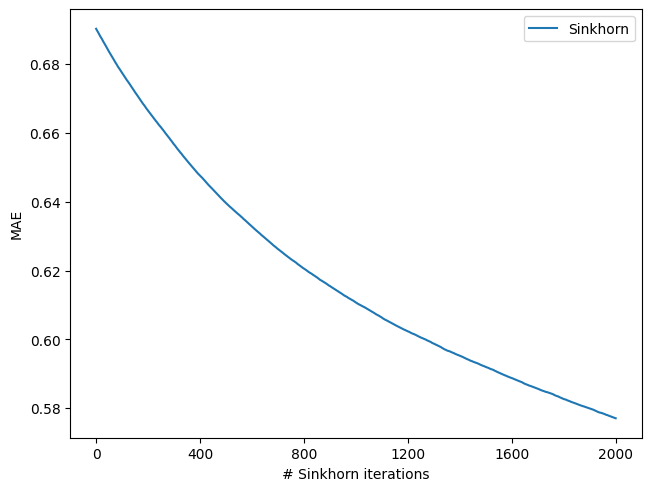

In [36]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes25mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes25mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')
ax.set_ylabel('MAE')
plt.legend()
plt.show()

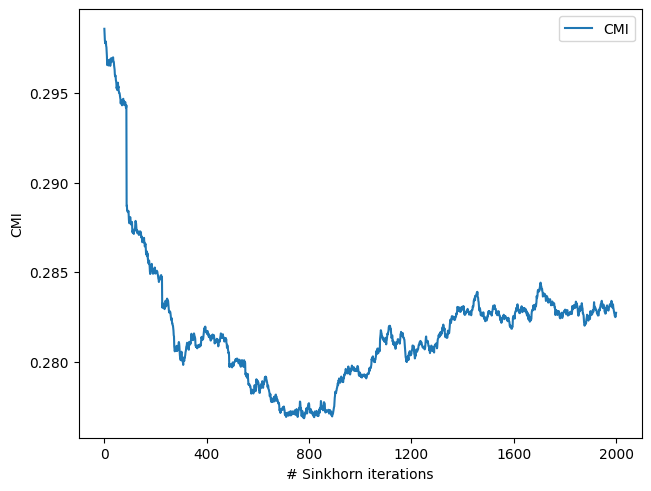

In [42]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(cmi_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, cmi_loss_mcar25, label='CMI')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('CMI')
plt.legend()
plt.show()

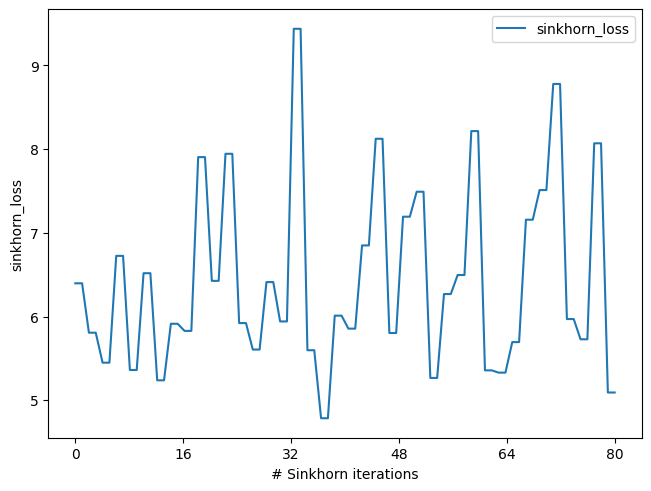

In [38]:
sinkhorn_loss_mcar25 = torch.tensor(sinkhorn_loss_mcar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mcar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

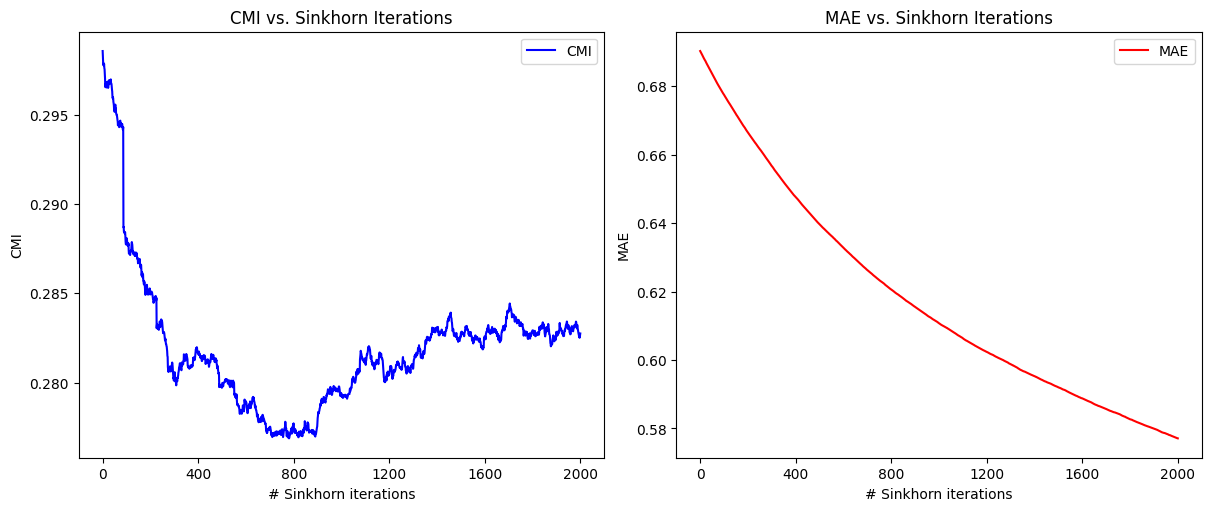

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mcar25)  # Length of CMI data
npoints_mae = len(sk_maes25mcar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mcar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mcar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


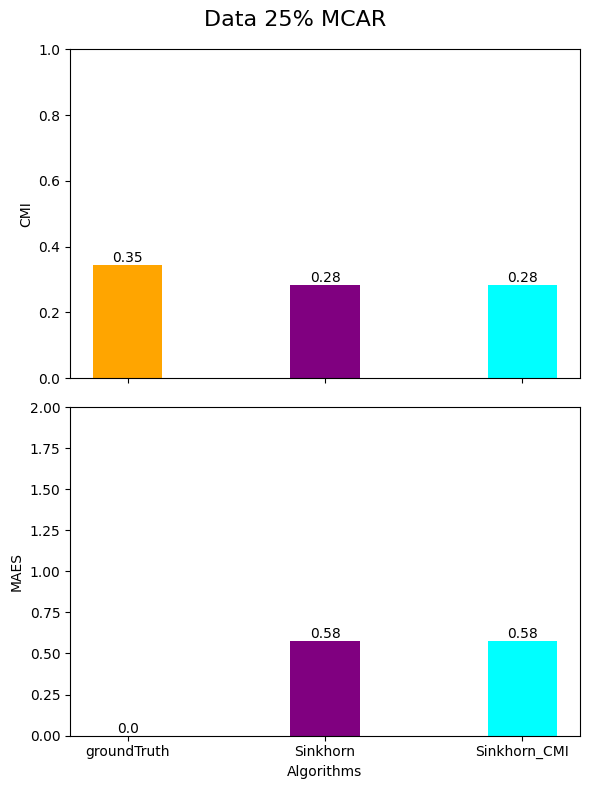

In [40]:

# Define values and categories
values_cmi_mcar25 = [cmi_groundTruth,on_cmi_missmcar25,cmi_mcar25]
values_maes_mcar25 = [0.0,on_sk_mae_mcar25.detach(),sk_mae_mcar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MCAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**25% MAR**

In [44]:
dependencies_mar25 = {"occupation": {
        "influencers": ["workclass"],
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["workclass"]<1 else 0.1 
    },
    "education-num": {
        "influencers": ["sex"],
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"]==1 else 0.1
    },
    "marital-status": {
        "influencers": ["relationship"],
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["relationship"]<=25 else 0.1
    },
    "native-country": {
        "influencers": ["race"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["race"]==1 else 0.1
    },
    "hours-per-week": {
        "influencers": ["age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]==1 else 0.1 
    },
    
    "capital-loss": {
        "influencers": ["marital-status"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["marital-status"]<2 else 0.1
    },

    "race": {
        "influencers": ["workclass"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["workclass"]<=25 else 0.1
    }



}

Generating MAR 25%, and added the target coloumn with the 25% missing MAR data

In [45]:
generator_mar25 = Inject_Missing_Values()
miss_mar25,index_mar25 = generator_mar25.MAR(X,dependencies_mar25,missing_rate=25)
miss_mar25 = pd.concat([miss_mar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar25 = miss_mar25.isnull().sum().sum() / miss_mar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

Total Missing Percentage MAR25: 23.21%


In [46]:
missing_percentage = (miss_mar25.isnull().sum() / len(miss_mar25)) * 100
print(missing_percentage)

age                0.000000
workclass          0.000000
fnlwgt             0.000000
education-num     51.123347
marital-status    66.456592
occupation        19.395427
relationship       0.000000
race              66.443324
sex                0.000000
capital-gain       0.000000
capital-loss      42.023794
hours-per-week    19.676264
native-country    59.880147
income             0.000000
dtype: float64


In [47]:
miss_mar25_numpy = scale(miss_mar25) #z-score scaling
miss_mar25_tensor = torch.tensor(miss_mar25_numpy) #converting to tensor

In [48]:
print(miss_mar25)

       age  workclass  fnlwgt  education-num  marital-status  occupation  \
0       39          1   77516            NaN             NaN         1.0   
1       50          3   83311           13.0             NaN         1.0   
2       38          2  215646            9.0             NaN         NaN   
3       53          2  234721            NaN             1.0         NaN   
4       28          2  338409           13.0             NaN         1.0   
...    ...        ...     ...            ...             ...         ...   
45217   33          2  245211            NaN             NaN         1.0   
45218   39          2  215419           13.0             2.0         1.0   
45219   38          2  374983            NaN             NaN         1.0   
45220   44          2   83891            NaN             NaN         1.0   
45221   35          3  182148            NaN             NaN         NaN   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0        

Applying Sinkhorn algorithm to MAR 25% data

In [ ]:
#only Sinkhorn
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
print(epsilon_mar25)
mask_mar25= torch.isnan(miss_mar25_tensor).double()


on_sk_imputer_mar25 = SinkhornImputation(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mar25, on_sk_maes25mar, on_sk_rmses25mar = on_sk_imputer_mar25.fit_transform(miss_mar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar25_numpy = on_sk_imp_mar25.detach().cpu().numpy()
on_sk_mae_mar25 = MAE(on_sk_imp_mar25,groundTruth_tensor , mask_mar25)
on_sk_rmse_mar25 = RMSE(on_sk_imp_mar25, groundTruth_tensor, mask_mar25)
print(on_sk_mae_mar25,on_sk_rmse_mar25)

INFO:root:batchsize = 128, epsilon = 0.7914
INFO:root:Iteration 0:	 Loss: 5.4770	 Validation MAE: 0.7227	RMSE: 1.0042


0.7914089195935361


INFO:root:Iteration 50:	 Loss: 5.3047	 Validation MAE: 0.6555	RMSE: 0.9887
INFO:root:Iteration 100:	 Loss: 5.0521	 Validation MAE: 0.6448	RMSE: 0.9830
INFO:root:Iteration 150:	 Loss: 5.3088	 Validation MAE: 0.6413	RMSE: 0.9794
INFO:root:Iteration 200:	 Loss: 5.4243	 Validation MAE: 0.6402	RMSE: 0.9789
INFO:root:Iteration 250:	 Loss: 5.2950	 Validation MAE: 0.6386	RMSE: 0.9765
INFO:root:Iteration 300:	 Loss: 5.6817	 Validation MAE: 0.6381	RMSE: 0.9757
INFO:root:Iteration 350:	 Loss: 5.0795	 Validation MAE: 0.6368	RMSE: 0.9748
INFO:root:Iteration 400:	 Loss: 5.4458	 Validation MAE: 0.6371	RMSE: 0.9750
INFO:root:Iteration 450:	 Loss: 5.2152	 Validation MAE: 0.6371	RMSE: 0.9751
INFO:root:Iteration 500:	 Loss: 4.8894	 Validation MAE: 0.6367	RMSE: 0.9756
INFO:root:Iteration 550:	 Loss: 5.2199	 Validation MAE: 0.6348	RMSE: 0.9750
INFO:root:Iteration 600:	 Loss: 4.9508	 Validation MAE: 0.6352	RMSE: 0.9741
INFO:root:Iteration 650:	 Loss: 5.2203	 Validation MAE: 0.6361	RMSE: 0.9742
INFO:root:Ite

tensor(0.6356, grad_fn=<DivBackward0>) tensor(0.9703, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn Imputation

In [ ]:
#only CMI
on_cmi_missmar25 = CMI.conditional_mutual_information(on_sk_imp_mar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmar25)
print(on_sk_mae_mar25)

0.1783481382293862
tensor(0.6356, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MAR 25% data

In [ ]:
#sinkhorn_CMI
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar25)
mask_mar25 = torch.isnan(miss_mar25_tensor).double()


sk_imputer_mar25 = SinkhornImputation_CMI(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mar25, sk_maes25mar, sk_rmses25mar,cmi_loss_mar25,sinkhorn_loss_mar25 = sk_imputer_mar25.fit_transform(miss_mar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar25_numpy = sk_imp_mar25.detach().cpu().numpy()

sk_mae_mar25 = MAE(sk_imp_mar25,groundTruth_tensor , mask_mar25)
sk_rmse_mar25 = RMSE(sk_imp_mar25, groundTruth_tensor, mask_mar25)
print(sk_mae_mar25,sk_rmse_mar25)


0.7914089195935361


INFO:root:Iteration 0:	 Loss: 6.9427	 Validation MAE: 0.7223	RMSE: 1.0073
INFO:root:Iteration 50:	 Loss: 7.5063	 Validation MAE: 0.6565	RMSE: 0.9910
INFO:root:Iteration 100:	 Loss: 7.3345	 Validation MAE: 0.6461	RMSE: 0.9844
INFO:root:Iteration 150:	 Loss: 6.8694	 Validation MAE: 0.6433	RMSE: 0.9825
INFO:root:Iteration 200:	 Loss: 7.4275	 Validation MAE: 0.6409	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 6.9849	 Validation MAE: 0.6391	RMSE: 0.9781
INFO:root:Iteration 300:	 Loss: 6.6692	 Validation MAE: 0.6390	RMSE: 0.9776
INFO:root:Iteration 350:	 Loss: 7.0019	 Validation MAE: 0.6372	RMSE: 0.9763
INFO:root:Iteration 400:	 Loss: 7.8483	 Validation MAE: 0.6376	RMSE: 0.9761
INFO:root:Iteration 450:	 Loss: 7.4680	 Validation MAE: 0.6377	RMSE: 0.9764
INFO:root:Iteration 500:	 Loss: 6.9773	 Validation MAE: 0.6375	RMSE: 0.9764
INFO:root:Iteration 550:	 Loss: 7.1068	 Validation MAE: 0.6356	RMSE: 0.9761
INFO:root:Iteration 600:	 Loss: 7.1895	 Validation MAE: 0.6354	RMSE: 0.9747
INFO:root:Itera

tensor(0.6360, grad_fn=<DivBackward0>) tensor(0.9705, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [ ]:
#CMI
cmi_mar25 = CMI.conditional_mutual_information(sk_imp_mar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mar25)
print(sk_mae_mar25,sk_rmse_mar25)

0.17955728869178048
tensor(0.6360, grad_fn=<DivBackward0>) tensor(0.9705, grad_fn=<SqrtBackward0>)


C:\Users\zhossai3\AppData\Local\Temp\ipykernel_11344\635805616.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)


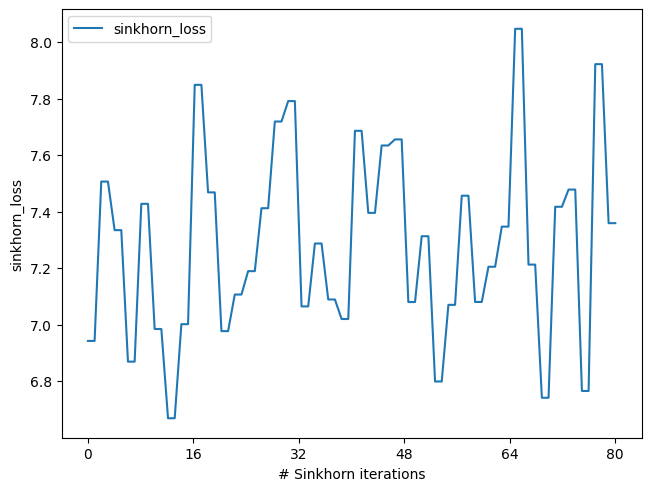

In [ ]:
sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

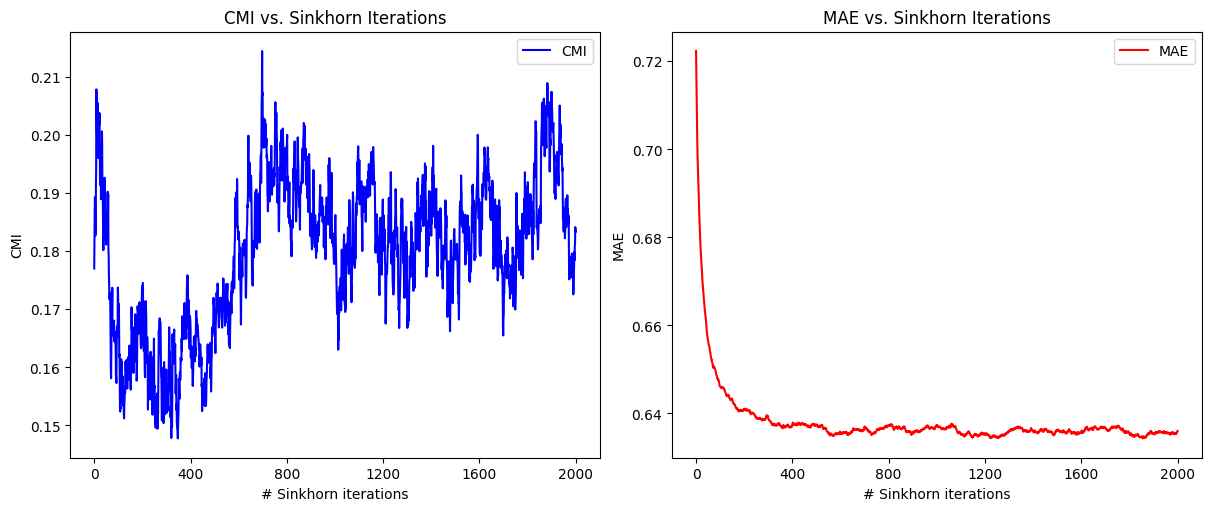

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mar25)  # Length of CMI data
npoints_mae = len(sk_maes25mar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


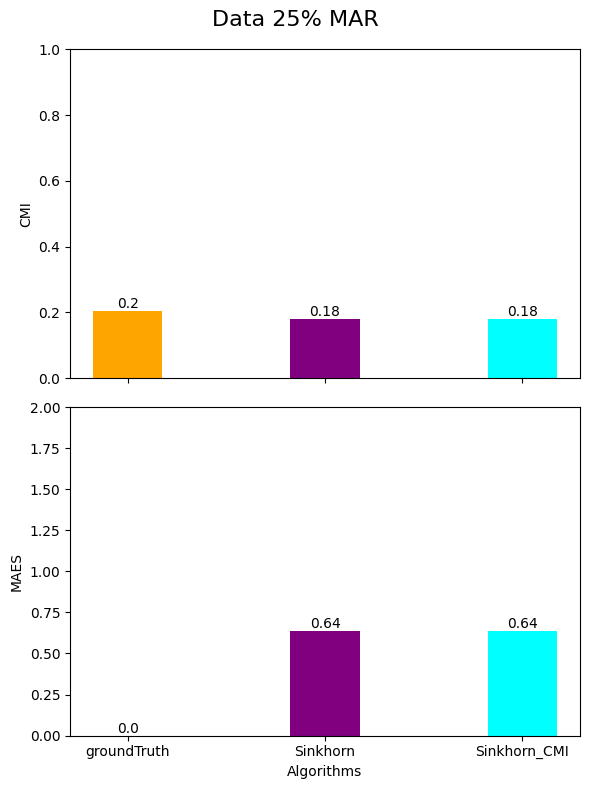

In [ ]:

# Define values and categories
values_cmi_mar25 = [cmi_groundTruth,on_cmi_missmar25,cmi_mar25]
values_maes_mar25 = [0.0,on_sk_mae_mar25.detach(),sk_mae_mar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


In [ ]:
# Find the best trade-off index using the heuristic
best_tradeoff_idx = np.argmin(sinkhorn_loss_mar25 + cmi_loss_mar25)

# Get the corresponding values
best_cmi = cmi_loss_mar25[best_tradeoff_idx]
best_mae = sk_maes25mar[best_tradeoff_idx]

# Display the best trade-off values
best_tradeoff_idx, best_cmi, best_mae


**25% MNAR**

In [ ]:
dependencies_mnar25 = {
    
    "occupation": {
       
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["occupation"]<1 else 0.1 
    },
    "education-num": {
      
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["education-num"]==1 else 0.1
    },
    "marital-status": {
       
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["marital-status"]<=25 else 0.1
    },
    "native-country": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["native-country"]==1 else 0.1
    },
    "hours-per-week": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["hours-per-week"]==1 else 0.1
    },
    
    "capital-loss": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["capital-loss"]<2 else 0.1
    },

    "race": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["race"]<=25 else 0.1
    },

    "sex": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"]<=25 else 0.1
    },

    "age": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.1 
    }



}

Generating MNAR 25%, and added the target coloumn with the 25% missing MNAR data

In [ ]:
generator_mnar25 = Inject_Missing_Values()
miss_mnar25,index_mnar25 = generator_mnar25.MNAR(X,dependencies_mnar25,missing_rate=25)

miss_mnar25 = pd.concat([miss_mnar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar25 = miss_mnar25.isnull().sum().sum() / miss_mnar25.size * 100
print(f"Total Missing Percentage MNAR25: {total_missing_percentage_mnar25:.2f}%")

Total Missing Percentage MNAR25: 23.86%


In [ ]:
missing_percentage = (miss_mnar25.isnull().sum() / len(miss_mnar25)) * 100
print(missing_percentage)

checking-account                         47.7
duration                                 49.6
credit-history                            0.0
purpose                                   0.0
credit-amount                            21.2
savings-account                          41.2
employment-since                         32.2
installment-rate                          0.0
other-debtors                            45.7
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        48.5
housing                                  48.0
existing-credits                          0.0
job                                      44.6
number-people-provide-maintenance-for    71.5
telephone                                 0.0
foreign-worker                           74.8
sex                                       0.0
marital-status                            0.0
class-label                       

In [ ]:
miss_mnar25_numpy = scale(miss_mnar25) #z-score scaling
miss_mnar25_tensor = torch.tensor(miss_mnar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MNAR 25% data

In [ ]:
#only Sinkhorn
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
print(epsilon_mnar25)
mask_mnar25= torch.isnan(miss_mnar25_tensor).double()


on_sk_imputer_mnar25 = SinkhornImputation(eps=epsilon_mnar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mnar25, on_sk_maes25mnar, on_sk_rmses25mnar = on_sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar25_numpy = on_sk_imp_mnar25.detach().cpu().numpy()
on_sk_mae_mnar25 = MAE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
on_sk_rmse_mnar25 = RMSE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print(on_sk_mae_mnar25, on_sk_rmse_mnar25)

INFO:root:batchsize = 128, epsilon = 0.7923
INFO:root:Iteration 0:	 Loss: 5.7076	 Validation MAE: 0.6668	RMSE: 0.9645


0.7923292030320952


INFO:root:Iteration 50:	 Loss: 5.3259	 Validation MAE: 0.6110	RMSE: 0.9483
INFO:root:Iteration 100:	 Loss: 5.3726	 Validation MAE: 0.6012	RMSE: 0.9435
INFO:root:Iteration 150:	 Loss: 5.6820	 Validation MAE: 0.5957	RMSE: 0.9397
INFO:root:Iteration 200:	 Loss: 5.7264	 Validation MAE: 0.5928	RMSE: 0.9363
INFO:root:Iteration 250:	 Loss: 6.0913	 Validation MAE: 0.5905	RMSE: 0.9339
INFO:root:Iteration 300:	 Loss: 5.2406	 Validation MAE: 0.5912	RMSE: 0.9335
INFO:root:Iteration 350:	 Loss: 5.5132	 Validation MAE: 0.5917	RMSE: 0.9332
INFO:root:Iteration 400:	 Loss: 6.2569	 Validation MAE: 0.5900	RMSE: 0.9316
INFO:root:Iteration 450:	 Loss: 5.6684	 Validation MAE: 0.5905	RMSE: 0.9326
INFO:root:Iteration 500:	 Loss: 5.5527	 Validation MAE: 0.5881	RMSE: 0.9304
INFO:root:Iteration 550:	 Loss: 5.7824	 Validation MAE: 0.5873	RMSE: 0.9297
INFO:root:Iteration 600:	 Loss: 5.2420	 Validation MAE: 0.5879	RMSE: 0.9307
INFO:root:Iteration 650:	 Loss: 5.5181	 Validation MAE: 0.5874	RMSE: 0.9306
INFO:root:Ite

tensor(0.5888, grad_fn=<DivBackward0>) tensor(0.9291, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn Imputation

In [ ]:
#only CMI
on_cmi_missmnar25 = CMI.conditional_mutual_information(on_sk_imp_mnar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmnar25)
print(on_sk_mae_mnar25,on_sk_rmse_mnar25)

0.20288026192869105
tensor(0.5888, grad_fn=<DivBackward0>) tensor(0.9291, grad_fn=<SqrtBackward0>)


Applying Sinkhorn-CMI algorithm to MNAR 25% data

In [ ]:
#sinkhorn_CMI
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar25)
mask_mnar25 = torch.isnan(miss_mnar25_tensor).double()


sk_imputer_mnar25 = SinkhornImputation_CMI(eps = epsilon_mnar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mnar25, sk_maes25mnar, sk_rmses25mnar,cmi_loss_mnar25, sinkhorn_loss_mnar25 = sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar25_numpy = sk_imp_mnar25.detach().cpu().numpy()

sk_mae_mnar25 = MAE(sk_imp_mnar25, groundTruth_tensor , mask_mnar25)
sk_rmse_mnar25 = RMSE(sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print(sk_mae_mnar25, sk_rmse_mnar25)





0.7923292030320952


INFO:root:Iteration 0:	 Loss: 7.5839	 Validation MAE: 0.6684	RMSE: 0.9684
INFO:root:Iteration 50:	 Loss: 8.0436	 Validation MAE: 0.6118	RMSE: 0.9492
INFO:root:Iteration 100:	 Loss: 7.5607	 Validation MAE: 0.6010	RMSE: 0.9431
INFO:root:Iteration 150:	 Loss: 7.7766	 Validation MAE: 0.5981	RMSE: 0.9407
INFO:root:Iteration 200:	 Loss: 7.8110	 Validation MAE: 0.5941	RMSE: 0.9370
INFO:root:Iteration 250:	 Loss: 7.6452	 Validation MAE: 0.5923	RMSE: 0.9357
INFO:root:Iteration 300:	 Loss: 7.3966	 Validation MAE: 0.5913	RMSE: 0.9347
INFO:root:Iteration 350:	 Loss: 7.8436	 Validation MAE: 0.5910	RMSE: 0.9341
INFO:root:Iteration 400:	 Loss: 7.9201	 Validation MAE: 0.5898	RMSE: 0.9334
INFO:root:Iteration 450:	 Loss: 8.4329	 Validation MAE: 0.5903	RMSE: 0.9337
INFO:root:Iteration 500:	 Loss: 7.6480	 Validation MAE: 0.5886	RMSE: 0.9324
INFO:root:Iteration 550:	 Loss: 7.6659	 Validation MAE: 0.5884	RMSE: 0.9313
INFO:root:Iteration 600:	 Loss: 7.8441	 Validation MAE: 0.5872	RMSE: 0.9308
INFO:root:Itera

tensor(0.5890, grad_fn=<DivBackward0>) tensor(0.9288, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [ ]:
#CMI
cmi_mnar25 = CMI.conditional_mutual_information(sk_imp_mnar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mnar25)
print(sk_mae_mnar25,sk_rmse_mnar25)

0.21279227874799675
tensor(0.5890, grad_fn=<DivBackward0>) tensor(0.9288, grad_fn=<SqrtBackward0>)


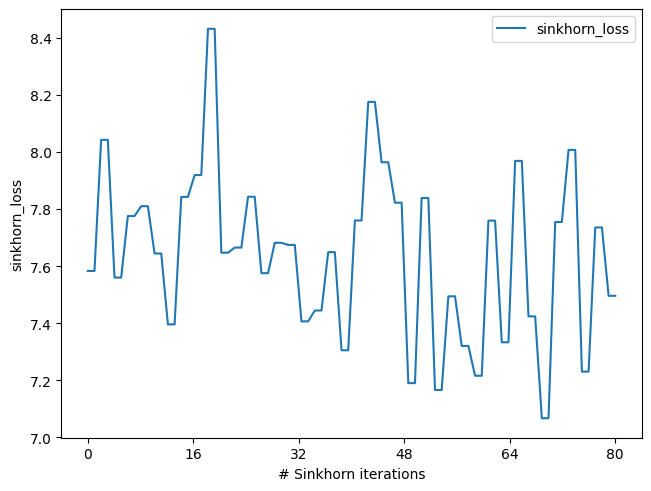

In [ ]:
sinkhorn_loss_mnar25 = torch.tensor(sinkhorn_loss_mnar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mnar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mnar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

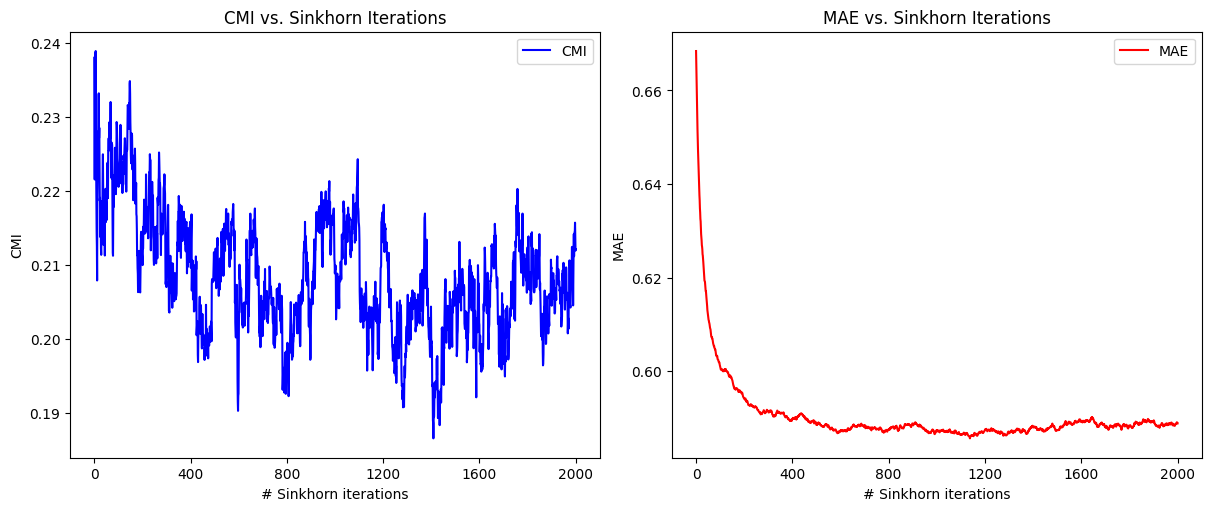

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mnar25)  # Length of CMI data
npoints_mae = len(sk_maes25mnar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mnar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mnar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


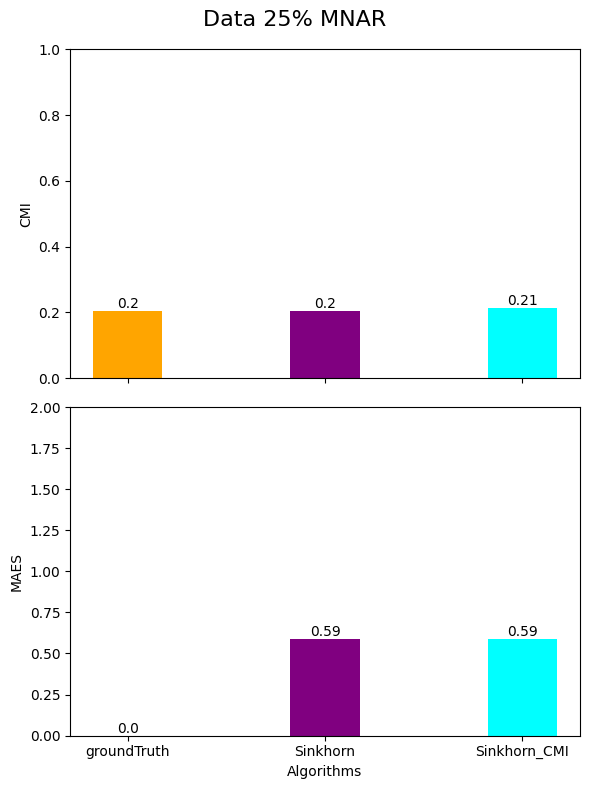

In [ ]:

# Define values and categories
values_cmi_mnar25 = [cmi_groundTruth,on_cmi_missmnar25,cmi_mnar25]
values_maes_mnar25 = [0.0,on_sk_mae_mnar25.detach(),sk_mae_mnar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MNAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mnar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAES bars and add values on top
bars2 = ax2.bar(index, values_maes_mnar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


In [ ]:
# Find the best trade-off index using the heuristic
best_tradeoff_idx = np.argmin(sinkhorn_loss_mnar25 + cmi_loss_mnar25)

# Get the corresponding values
best_cmi = cmi_loss_mnar25[best_tradeoff_idx]
best_mae = sk_maes25mnar[best_tradeoff_idx]

# Display the best trade-off values
best_tradeoff_idx, best_cmi, best_mae
